# Step-by-Step Exploratory Data Analysis (EDA) using Python
Analyze the factors influencing the used car's price

### Import Python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Reading Dataset

In [3]:
df_car = pd.read_csv('used_cars_data.csv')
df_car.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_car.shape

(7253, 14)

In [5]:
# check data is dtype, non-null or null
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
# Check for duplication
df_car.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [7]:
# missing values calculation
df_car.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
# calculate the percent of missing values in column
(df_car.isnull().sum()/(len(df_car))) * 100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

Columns New_price ~ 86% and Price ~17% missing values 

### Data Reduction
Some columns or variables can be dropped if they do not add value to our analysis.

In [10]:
df_car.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [14]:
# remove S.No column from data
df_car = df_car.drop(['S.No.'],axis = 1)

# check
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


### Feature Engineering

In [15]:
# Create Future "Car_Age" to know the age of the car
from datetime import date 

# date.today().year
df_car['Car_Age'] = date.today().year - df_car['Year']
df_car.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,11
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,10
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,9


In [21]:
# Let’s split the name and introduce new variables “Brand” and “Model”
df_car['Brand'] = df_car.Name.str.split().str.get(0)

df_car['Model'] = df_car.Name.str.split().str.get(1) + df_car.Name.str.split().str.get(2)

df_car[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


### Data Cleaning

In [23]:
# we can check Some data may have data entry errors, and some variables may need data type conversion
print(df_car.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


The brand name ‘Isuzu’ ‘ISUZU’ and ‘Mini’ and ‘Land’ looks incorrect. This needs to be corrected

In [24]:
searchfor = ['ISUZU','Isuzu','Mini','Land']
df_car[df_car.Brand.str.contains('|'.join(searchfor))].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,8,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,10,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,5,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,4,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,5,Mini,CooperConvertible


In [28]:
df_car['Brand'].replace({'ISUZU':'Isuzu','Mini':'Mini Cooper','Land':'Land Rover'},inplace=True)

## We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

### EDA Exploratory Data Analysis

In [47]:
# Statistics Summary
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,8.634634,3.254421,3.00,6.0,8.00,11.00,26.0


From the statistics summary, we can infer the below findings :
    
    - year 1996-2022 :  has a high in a range which shows used cars contain both latest models and old model cars.
    
    - On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.

    - The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.
    
    - The average number of seats in a car is 5. car seat is an important feature in price contribution.
    ...

Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [41]:
cat_cols=df_car.select_dtypes(include=['object']).columns
num_cols = df_car.select_dtypes(include=np.number).columns.to_list()
print('Categorical Variables:')
print(cat_cols)
print('Numerical Variables:')
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew : -0.84


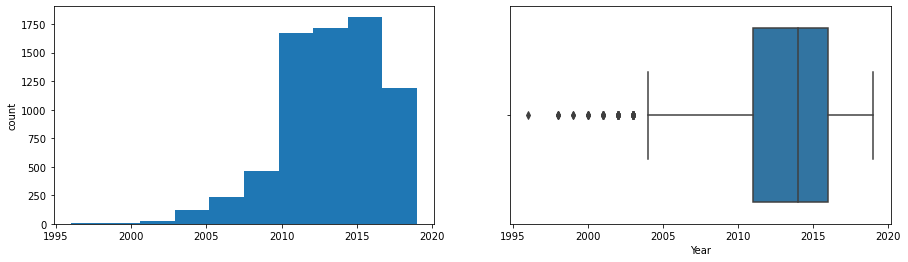

Kilometers_Driven
Skew : 61.58


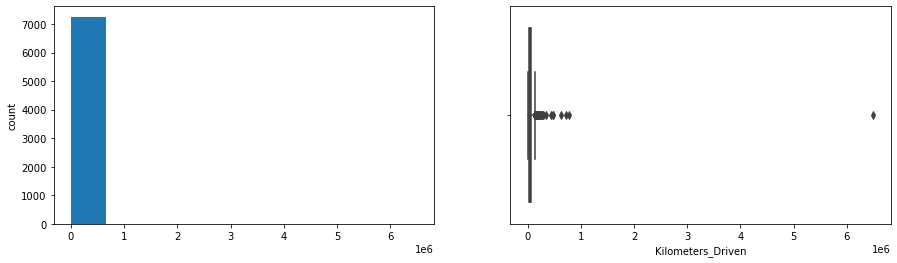

Seats
Skew : 1.9


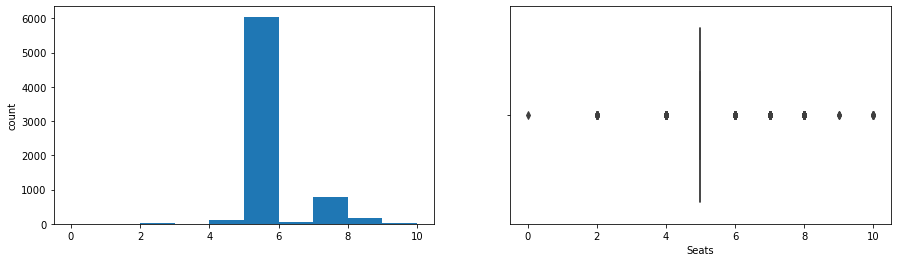

Price
Skew : 3.34


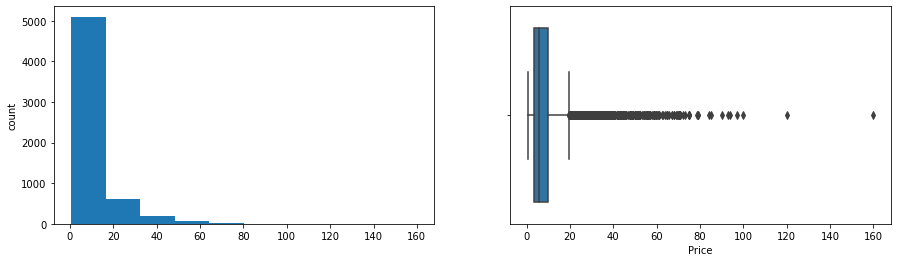

Car_Age
Skew : 0.84


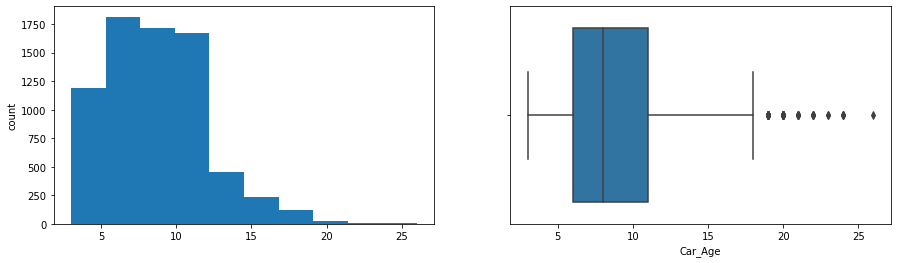

In [45]:
for col in num_cols:
    print(col)
    print('Skew :', round(df_car[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_car[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_car[col])
    plt.show()

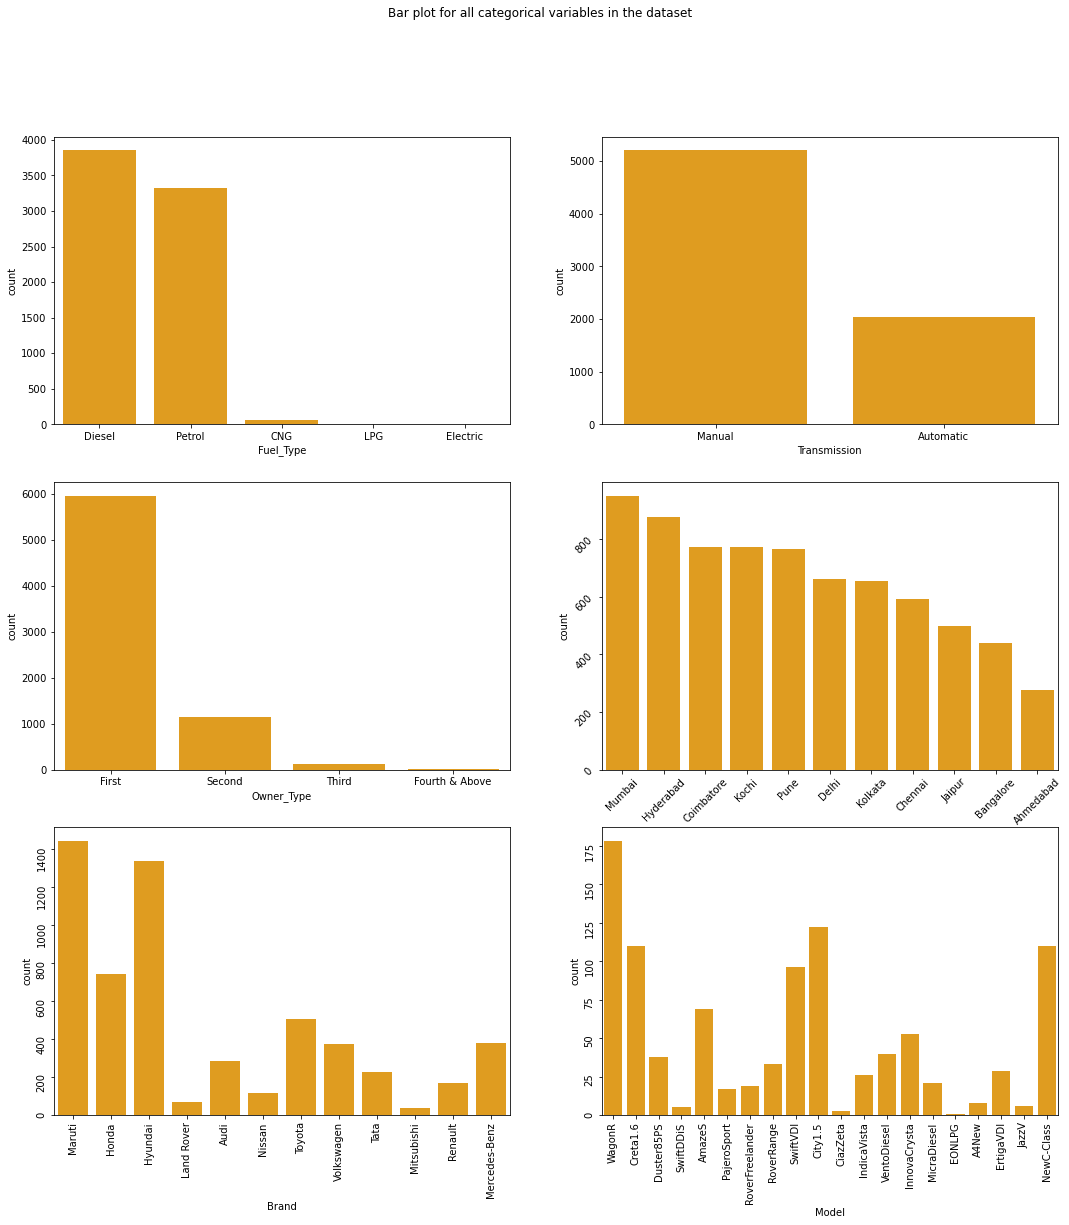

In [62]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = df_car, color = 'orange', 
              order = df_car['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = df_car, color = 'orange', 
              order = df_car['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = df_car, color = 'orange', 
              order = df_car['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = df_car, color = 'orange', 
              order = df_car['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = df_car, color = 'orange', 
              order = df_car['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = df_car, color = 'orange', 
              order = df_car['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

From the count plot, we can have below observations:<p/>
Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore<p/>
~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance<p/>
~72% of cars have manual transmission<p/>
~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars<p/>
~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai<p/>
WagonR ranks first among all models which are available for purchase


### Data Transformation

In [49]:
def log_transform(df_car,col):
    for colname in col:
        if (df_car[colname]==1.0).all():
            df_car[colname +'_log'] = np.log(df_car[colname] + 1)
        else: 
            df_car[colname +'_log'] = np.log(df_car[colname])
    df_car.info

In [58]:
log_transform(df_car,['Kilometers_Driven','Price'])

<AxesSubplot:xlabel='Kilometers_Driven_log', ylabel='Density'>

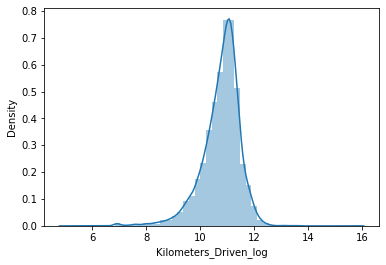

In [59]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df_car['Kilometers_Driven_log'], axlabel='Kilometers_Driven_log')

<AxesSubplot:xlabel='Price_log', ylabel='Density'>

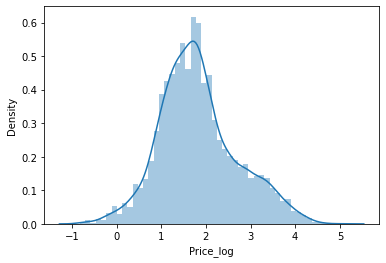

In [60]:
sns.distplot(df_car['Price_log'], axlabel='Price_log')

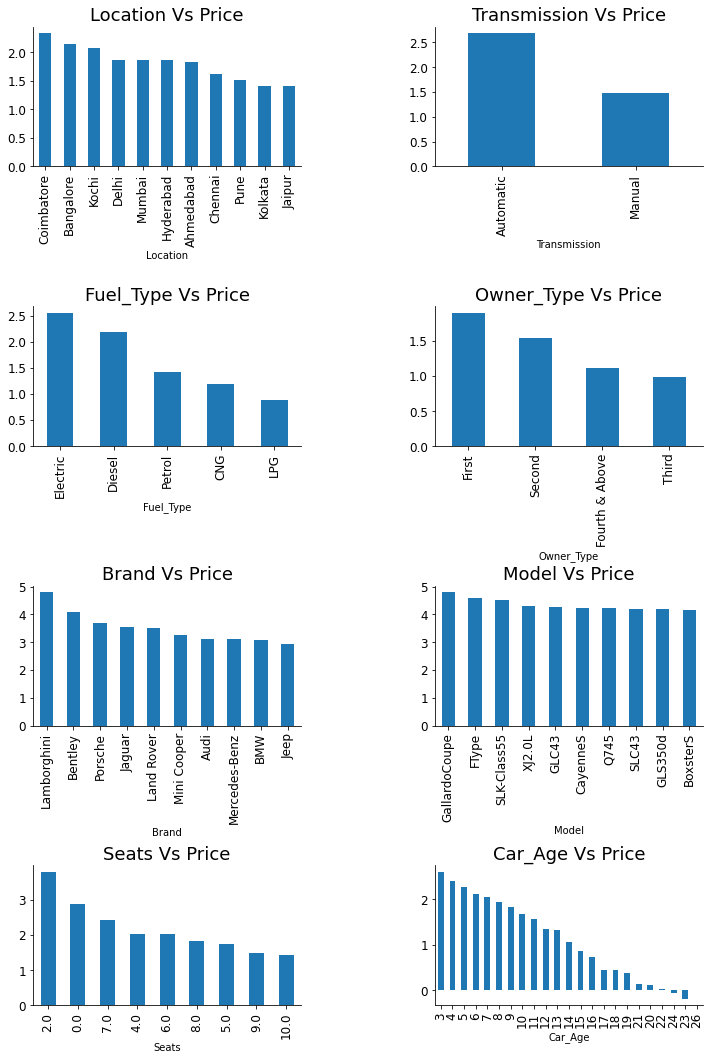

In [63]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df_car.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df_car.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df_car.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df_car.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df_car.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df_car.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df_car.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df_car.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

The price of cars is high in Coimbatore and less price in Kolkata and Jaipur</p>
Automatic cars have more price than manual cars.</p>
Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price</p>
First-owner cars are higher in price, followed by a second</p>
The third owner’s price is lesser than the Fourth and above</p>
Lamborghini brand is the highest in price</p>
Gallardocoupe Model is the highest in price</p>
2 Seater has the highest price followed by 7 Seater</p>
The latest model cars are high in price</p>

### EDA Multivariate Analysis
A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

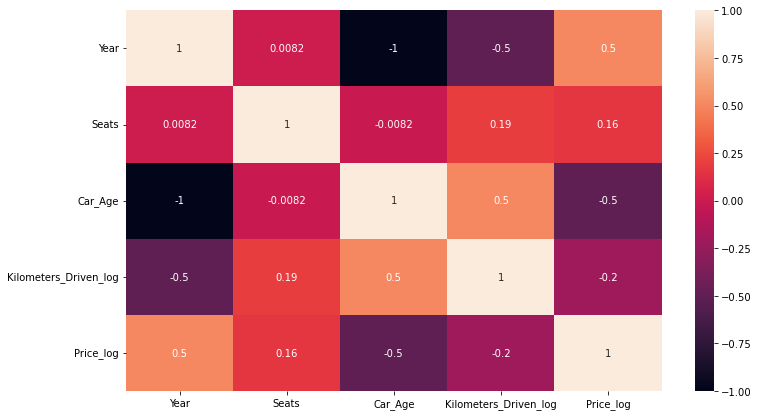

In [64]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_car.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Kilometer driven has a negative correlation to year not much impact on the price</p>
car Age is positively correlated to Kilometers-Driven as the Age of the car increases</p>
Price is moderately positive in correlation to year.</p>
kilometer driven has a negative correlation with year

## Conclusion

Most of the customers prefer 2 Seat cars hence the price of the 2-seat cars is higher than other cars</p>
The price of the car decreases as the Age of the car increases.</p>
Customers prefer to purchase the First owner rather than the Second or Third.</p>
Due to increased Fuel price, the customer prefers to purchase an Electric vehicle.</p>
Automatic Transmission is easier than Manual.</p>